In [1]:
# add matplotlib inline magic command
%matplotlib inline
#dependencies
import pandas as pd
import os
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [2]:
#files to load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:

#read the city_data.csv
city_data = os.path.join("Resources/city_data.csv")
city_df = pd.read_csv(city_data)
city_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [4]:
city_type=[]
driver=[]

In [5]:
#read the ride_data.csv
ride_data = os.path.join("Resources/ride_data.csv")
ride_df = pd.read_csv(ride_data)
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12
5,South Latoya,3/11/2019 12:26,9.52,1.995000e+12
6,New Paulville,2/27/2019 11:17,43.25,7.932080e+11
7,Simpsonburgh,4/26/2019 0:43,35.98,1.119540e+11
8,South Karenland,1/8/2019 3:28,35.09,7.995620e+12
9,North Jasmine,3/9/2019 6:26,42.81,5.327640e+12


In [6]:
#check Data Type
city_df.dtypes


city            object
driver_count     int64
type            object
dtype: object

In [7]:
#get number of  items on dictionaries
pd.value_counts(city_df['type'])

Urban       66
Suburban    36
Rural       18
Name: type, dtype: int64

In [8]:
#get the columns and the rows that are not full
city_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
#Get the columns and the rows thata are not null
city_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [11]:
#get the unique values of the type of city
city_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
sum(city_df["type"]=="Urban")


66

In [13]:
sum(city_df["type"]=="Suburban")

36

In [14]:
sum(city_df["type"]== "Rural")

18

In [15]:
#get the columns and the rows that are not blank
ride_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [16]:
#get the columns and rows that are null
ride_df.isnull().sum()



city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
#get the datat types of each column
ride_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [18]:
#merge data
pyber_data_df= pd.merge(ride_df,city_df, how= "left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [19]:
#create the urban city df
urban_city_df =pyber_data_df[pyber_data_df["type"]== "Urban"]
urban_city_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3.908450e+12,46,Urban


In [20]:
#create a suburban city df
suburban_city_df = pyber_data_df[pyber_data_df["type"]== "Suburban"]
suburban_city_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,1/27/2019 3:08,27.79,6.653620e+12,11,Suburban
1626,East Kentstad,4/7/2019 19:44,18.75,6.575960e+12,20,Suburban
1627,Lake Omar,1/17/2019 21:33,21.71,9.669120e+11,22,Suburban
1628,Myersshire,2/27/2019 17:38,17.10,5.706770e+12,19,Suburban
1629,West Hannah,4/19/2019 1:06,37.78,2.273050e+12,12,Suburban


In [21]:
#create a Rural city df
rural_city_df = pyber_data_df[pyber_data_df["type"]== "Rural"]
rural_city_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,4/13/2019 11:13,43.22,1.076080e+12,9,Rural
2251,North Holly,2/2/2019 14:54,12.42,1.985260e+12,8,Rural
2252,Michaelberg,3/27/2019 18:27,54.85,4.421840e+12,6,Rural
2253,Lake Latoyabury,2/23/2019 21:12,47.90,3.269650e+12,2,Rural
2254,Lake Latoyabury,5/6/2019 8:57,51.80,4.018030e+12,2,Rural


In [22]:
#get the number of rides of all urban cities
urban_ride_count = urban_city_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [23]:
##get the number of rides of all suburban cities
suburban_ride_count = suburban_city_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count.head()

city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [24]:
##get the number of rides of all rural cities
rural_ride_count = rural_city_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [25]:
#get the average fare for each city in the urban cities
urban_avg_fare = urban_city_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [26]:
#get the average fare for each city in the suburban cities
suburban_avg_fare = suburban_city_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare.head()

city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [27]:
#get the average fare for each city in the Rural cities
rural_avg_fare= rural_city_df.groupby(["city"]).mean()["fare"]
rural_avg_fare.head()

city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [28]:
#get the average # drivers for each city in urban cities
urban_driver_count= urban_city_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [29]:
#get the average # drivers for each city in suburban citie
suburban_driver_count = suburban_city_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [34]:
#get the average # drivers for each city in rural citie
rural_driver_count= rural_city_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

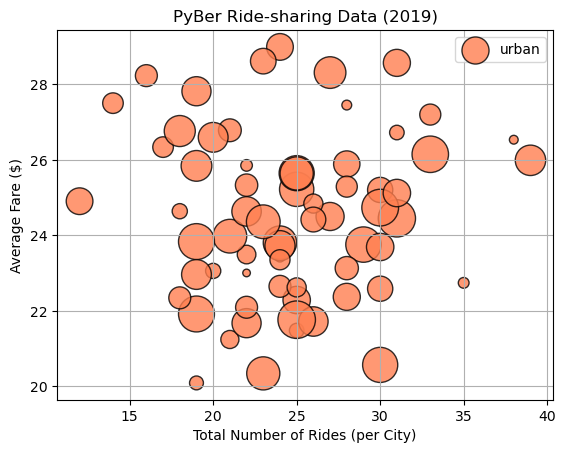

In [47]:
#build the scatter plots for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s=10* urban_driver_count, color= "coral", edgecolor= "black", alpha=0.8, label="urban")
plt.title("PyBer Ride-sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per City)")
plt.grid(True)
plt.legend()


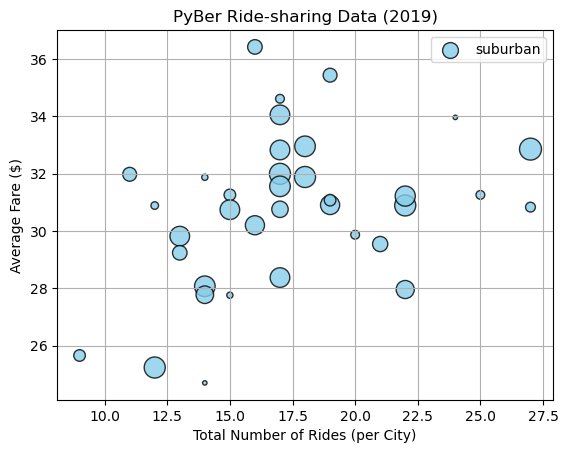

In [52]:
#built the scatter plot for suburban cities
plt.scatter(suburban_ride_count, suburban_avg_fare, color= "skyblue", edgecolor= "black", s=10*suburban_driver_count, alpha=0.8, label="suburban")
plt.title("PyBer Ride-sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (per City)")
plt.grid(True)
plt.legend()

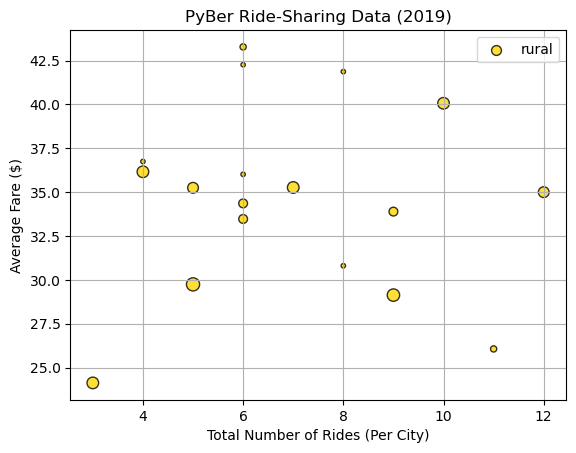

In [53]:
plt.scatter(rural_ride_count, rural_avg_fare,color= "gold", edgecolor= "black", s=10*rural_driver_count, alpha=0.8, label="rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
plt.legend()

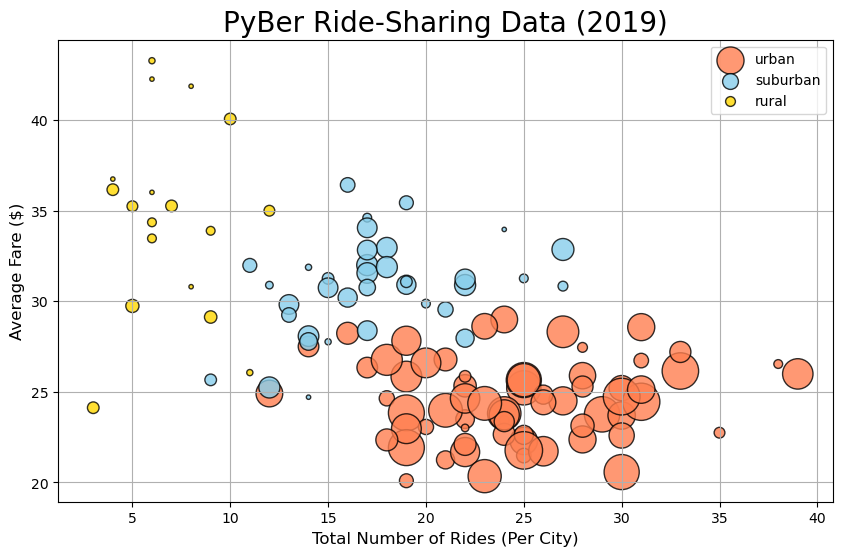

In [58]:
#combine plotes
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10* urban_driver_count, color= "coral", edgecolor= "black", linewidths=1, alpha=0.8, label="urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, color= "skyblue", edgecolor= "black", s=10*suburban_driver_count, alpha=0.8, label="suburban")
plt.scatter(rural_ride_count, rural_avg_fare,color= "gold", edgecolor= "black", s=10*rural_driver_count, alpha=0.8, label="rural")

# Incorporate the other graph propertie
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Add the legend.
plt.legend()
# Show the plot
plt.show()

TypeError: 'Legend' object is not iterable

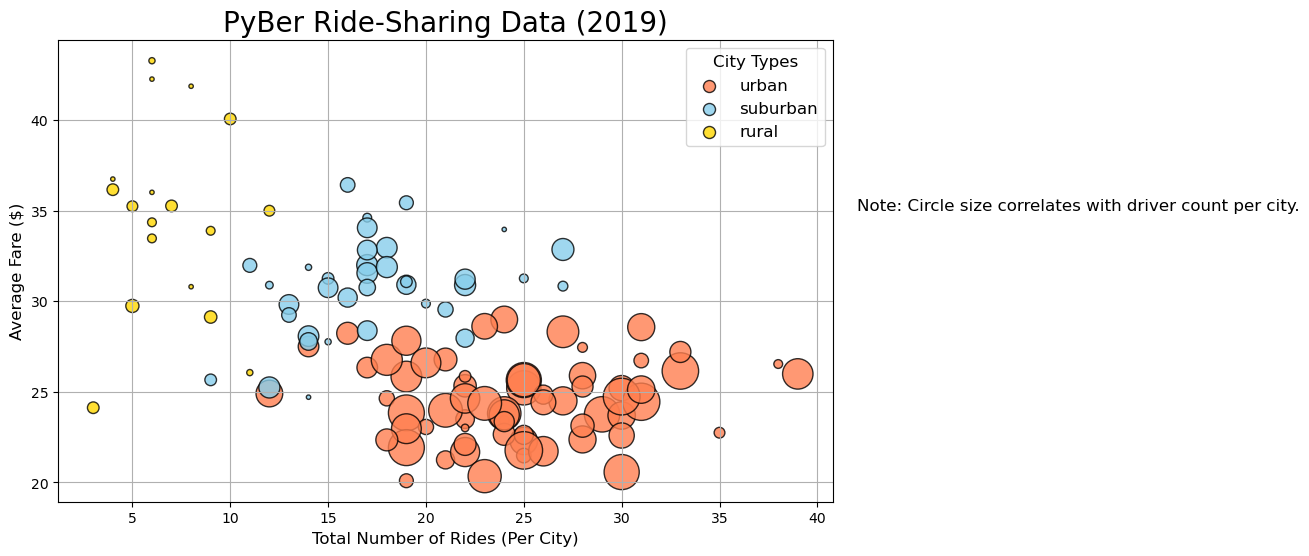

In [68]:
#combine plotes
plt.subplots(figsize=(10,6))
plt.scatter(urban_ride_count, urban_avg_fare, s=10* urban_driver_count, color= "coral", edgecolor= "black", linewidths=1, alpha=0.8, label="urban")
plt.scatter(suburban_ride_count, suburban_avg_fare, color= "skyblue", edgecolor= "black", s=10*suburban_driver_count, alpha=0.8, label="suburban")
plt.scatter(rural_ride_count, rural_avg_fare,color= "gold", edgecolor= "black", s=10*rural_driver_count, alpha=0.8, label="rural")

# Incorporate the other graph propertie
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)



#create a legend
lgnd = plt.legend(fontsize="12", mode="expanded", scatterpoints=1, loc="best",title= "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
# Save the figure.


# Add the legend.
plt.legend(lgnd)
# Show the plot
plt.show()
plt.savefig("analysis/Fig1.png")